In [3]:
import os
import pandas as pd
import panel as pn
pn.extension('plotly')
import plotly.express as px
import hvplot.pandas
import matplotlib.pyplot as plt
from panel.interact import interact
from panel import widgets
from pathlib import Path
import seaborn as sns
%matplotlib inline

In [11]:
file_path = Path("shop_vader.csv")
twitter_shop = pd.read_csv(file_path, index_col = "Unnamed: 0" )
twitter_shop.rename(columns = {"neg":"twitter_neg", "neu":"twitter_neu", "pos":"twitter_pos"}, inplace = True)
twitter_shop.dropna(inplace = True)
cols = ["twitter_neg", "twitter_neu", "twitter_pos"]
twitter_shop = twitter_shop[cols]
twitter_shop.head()

,twitter_neg,twitter_neu,twitter_pos
0,0.000,1.000,0.000
1,0.082,0.918,0.000
2,0.000,1.000,0.000
3,0.000,0.712,0.288
4,0.000,1.000,0.000


In [14]:
file_path = Path("shopify.csv")
news_shop = pd.read_csv(file_path)
news_shop.rename(columns = {"negative":"news_neg", "neutral":"news_neu", "positive":"news_pos"}, inplace = True)
cols = ["news_neg", "news_neu", "news_pos"]
news_shop = news_shop[cols]
news_shop.sort_index(ascending = True, inplace = True)
news_shop.head()

,news_neg,news_neu,news_pos
0,0.000,0.760,0.240
1,0.056,0.849,0.095
2,0.000,0.839,0.161
3,0.000,1.000,0.000
4,0.000,1.000,0.000


In [15]:
combined = pd.concat([twitter_shop, news_shop], axis = "columns",join = "inner")

combined.head()

,twitter_neg,twitter_neu,twitter_pos,news_neg,news_neu,news_pos
0,0.000,1.000,0.000,0.000,0.760,0.240
1,0.082,0.918,0.000,0.056,0.849,0.095
2,0.000,1.000,0.000,0.000,0.839,0.161
3,0.000,0.712,0.288,0.000,1.000,0.000
4,0.000,1.000,0.000,0.000,1.000,0.000


In [16]:
correlation = combined.corr()
correlation.head()

,twitter_neg,twitter_neu,twitter_pos,news_neg,news_neu,news_pos
twitter_neg,1.000000,-0.748057,0.300588,0.066119,-0.201774,0.174395
twitter_neu,-0.748057,1.000000,-0.857801,-0.022831,0.086196,-0.077878
twitter_pos,0.300588,-0.857801,1.000000,-0.018397,0.032394,-0.023145
news_neg,0.066119,-0.022831,-0.018397,1.000000,-0.408204,-0.198638
news_neu,-0.201774,0.086196,0.032394,-0.408204,1.000000,-0.813614


<AxesSubplot:>

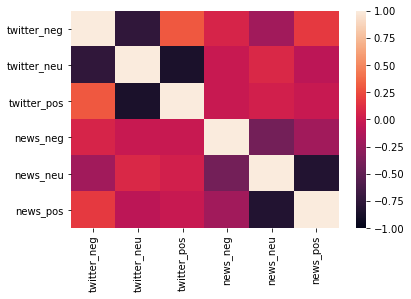

In [17]:
sns.heatmap(correlation, vmin=-1, vmax=1)